# Ejercicio de Trabajo en Clases 07: Búsqueda de una cara

<font color='red'>No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



**IMPORTANTE:** 

**===========**

Para desarrollar esta actividad será necesario que te familiarices con los ejemplos de 




* [Colab de Detección de Caras](https://colab.research.google.com/drive/1gM8JHeEkGudpAmGjiJARB-3-Sgo_EwW2?usp=sharing)

* [Colab de Reconocimiento Facial con ArcFace](https://colab.research.google.com/drive/1VgmFdJ2dr0DEWuoP6AiXeW2pxNRZYPEk?usp=sharing)

En este ejercicio deberá buscar la persona que se encuentra enrolada en una galería de imágenes.


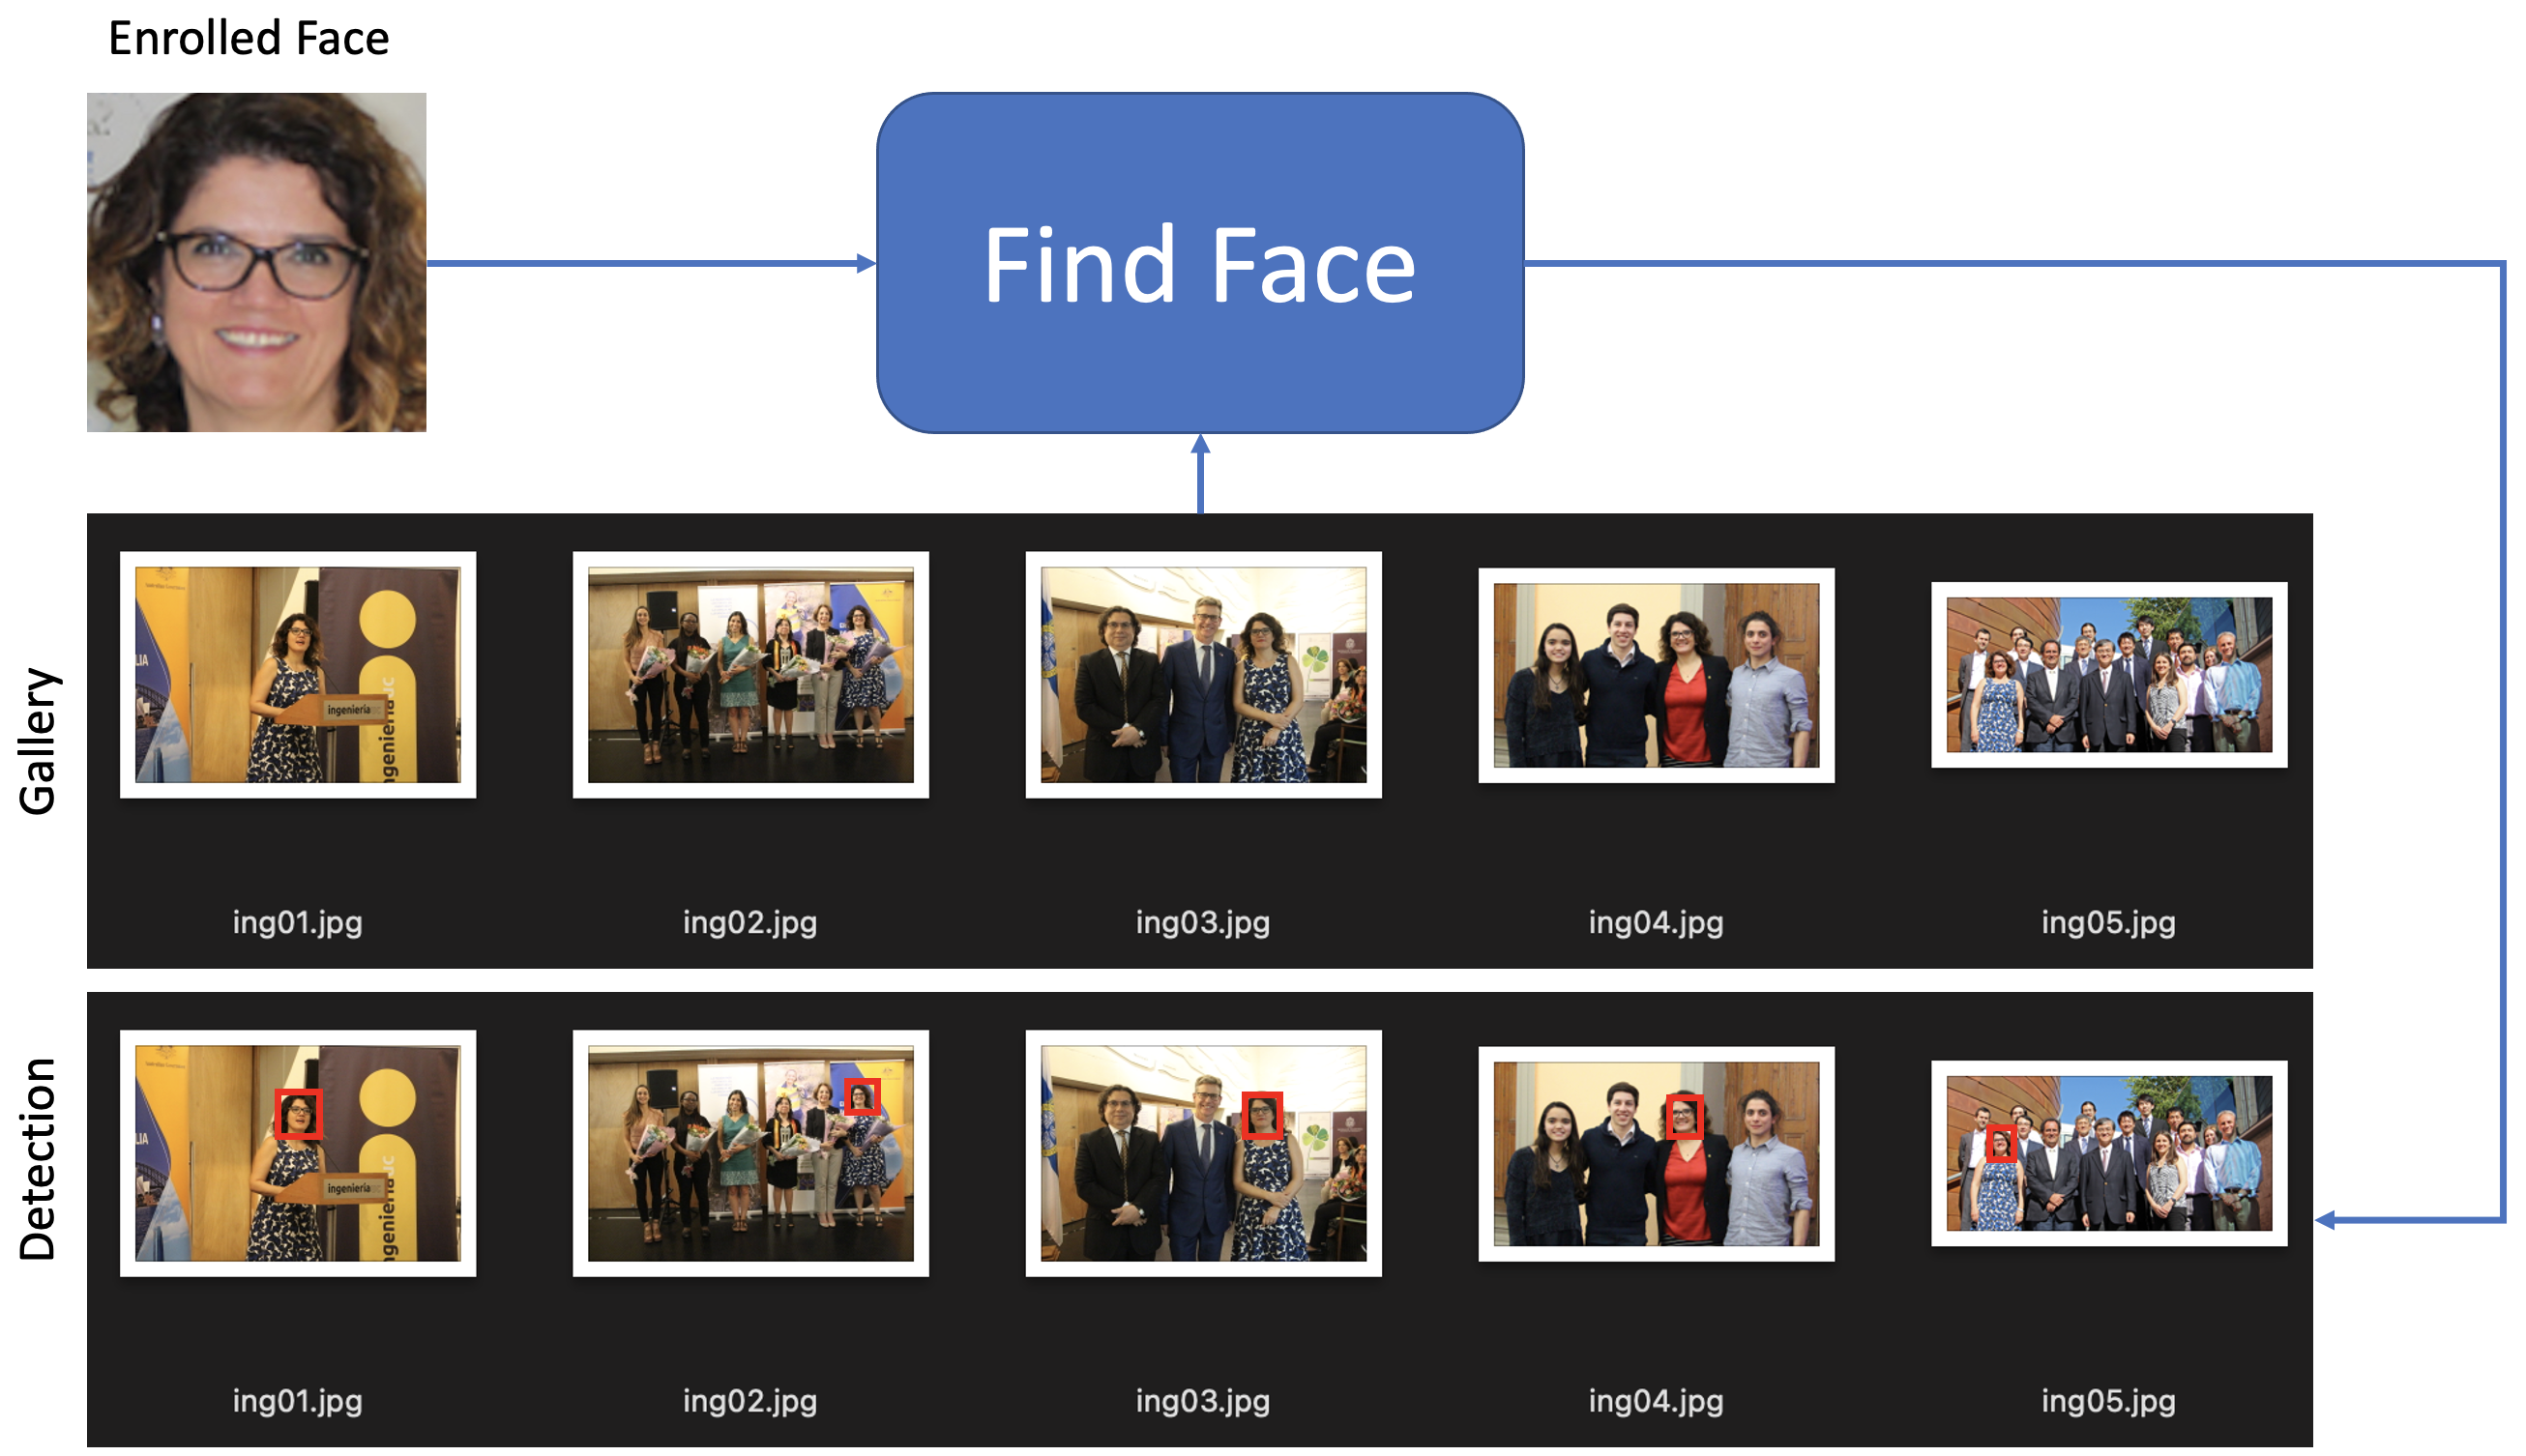

# 0) Ingrese Nombre de Grupo e Integrantes

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E07_Tu_Rut.ipynb" a "E07_12345678-9.ipynb"



# 1) Instalación de librerías

(1 punto)

Instale en esta parte todas las librerías necesarias para la correcta ejecución del código.

In [ ]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python

!pip install arcface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from mtcnn.mtcnn import MTCNN
from arcface import ArcFace

# 2) Descarga de la base de datos

(1 punto)

Cargue la base de datos del ejercicio que se encuentra en `https://www.dropbox.com/s/cc1r8liis5etz78/loreto.zip`.

En esta base de datos se encuentra:

* La persona enrolada a buscar (Loreto) cuenta con una foto de enrollamiento: `loreto.jpg`

* La galería de 5 fotos donde buscar se enciuentra en la carpeta `fotos/`



In [ ]:
!wget https://www.dropbox.com/s/cc1r8liis5etz78/loreto.zip

!unzip loreto.zip

--2022-10-18 03:04:09--  https://www.dropbox.com/s/cc1r8liis5etz78/loreto.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/cc1r8liis5etz78/loreto.zip [following]
--2022-10-18 03:04:09--  https://www.dropbox.com/s/raw/cc1r8liis5etz78/loreto.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc892bfff27892a83f4354508efe.dl.dropboxusercontent.com/cd/0/inline/BvApzZeLV7gGiU_tPlLegApxJlSwiWytV7_7MO3ZyyDbb8IOYa8qIfAYyy78lETYNxquPC1cru1O_gbYr2BjS5zJqHXJ-h3RiIDMQPg6xNVY7sdroZe7YmL4G3F2X0UmBcwbfkzZFOP5MVGqaH-r-1hoeS3gxdTzIzgT8ZIiInU55A/file# [following]
--2022-10-18 03:04:09--  https://uc892bfff27892a83f4354508efe.dl.dropboxusercontent.com/cd/0/inline/BvApzZeLV7gGiU_tPlLegApxJlSwiWytV7_7MO3ZyyDbb8IOYa8qIfAYyy78lETYNxquPC1cru1O_gbYr2BjS5

# 3) Detección de la cara de enrolamiento

(1 puntos)

Cargue la imagen de enorlamiento, y usando `face detection` haga un crop de la cara de enrolamiento y despliéguela.

In [ ]:
detector = MTCNN()

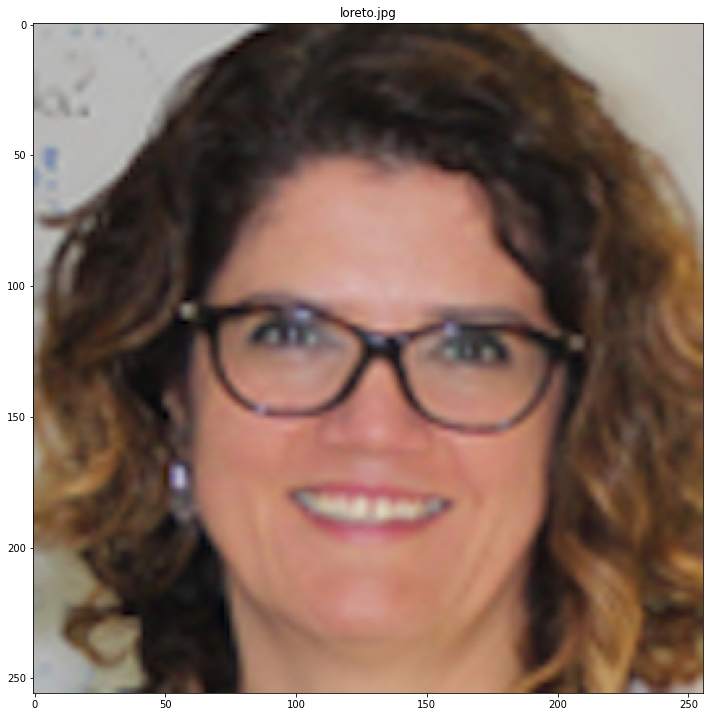

In [96]:
img = cv2.imread('loreto.jpg')
plt.figure(figsize=(12,30))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('loreto.jpg')
plt.show()

In [97]:
face_locations = detector.detect_faces(img)

1/1 [==============================] - 0s 14ms/step


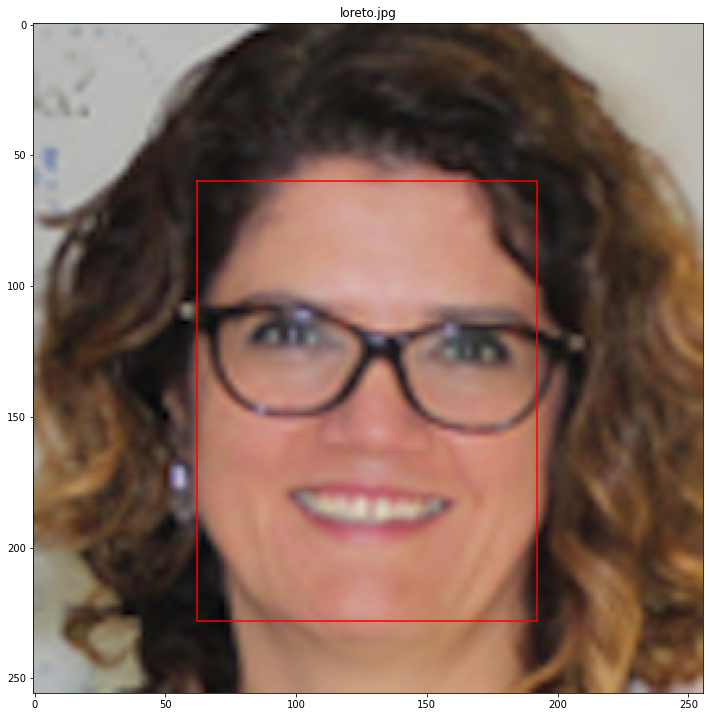

In [98]:
# Despliegue de resultados

plt.figure(figsize=(12,30))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('loreto.jpg')

n = len(face_locations)
for i in range(n):
  bb = face_locations[i]['box']
  x1 = bb[0]
  x2 = bb[0]+bb[2]
  y1 = bb[1]
  y2 = bb[1]+bb[3]
  x = [x1,x1,x2,x2,x1]
  y = [y1,y2,y2,y1,y1]
  plt.plot(x,y,c='red')

plt.show()


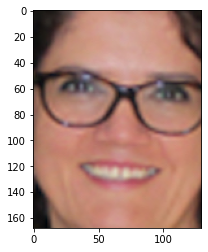

In [99]:
img_crop = img[y1:y2, x1:x2]

plt.imshow(cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB))

# 4) Extracción de embedding de la cara de enorlamiento

(1 punto)

Guarde en la variable `X` el embedding ArcFace (de 512 elementos) de la cara de enorlamiento.

In [100]:
arcface    = ArcFace.ArcFace()

X = arcface.calc_emb(img_crop)

# 5) Detección de caras de la galería 

(2 puntos)

Detecte todas las caras de las imágenes de la galería. El output de esta parte debe ser un arreglo `BB` de `N x 5`, donde `N` es el número total de caras detectadas. Para cada cara se debe almacenar las siguientes 5 variables:

* `k`: número de la imagen de la galería

* `x1,y1`: coordenadas de la esquina superior izquierda del bounding box 

* `x2,y2`: coordenadas de la esquina inferior derecha del bounding box 

In [ ]:
BB = np.array([0,0,0,0,0])

for k in range(1,6):
  im = cv2.imread('/content/fotos/ing0'+str(k)+'.jpg')
  face_locations = detector.detect_faces(im)
  n = len(face_locations)
  for i in range(n):
    bb = face_locations[i]['box']
    x1 = bb[0]
    x2 = bb[0]+bb[2]
    y1 = bb[1]
    y2 = bb[1]+bb[3]
    BB = np.vstack([BB,np.array([k, x1, y1, x2, y2])])

BB = BB[1:, :]

In [102]:
BB.shape

(44, 5)

#6) Extracción de embeddings de la galería

(2 puntos)

Usando el arreglo `BB` del ejercicio anterior defina una matriz `Y` de `N x 512` elementos, en donde la fila de índice `j` de `Y` contenga el embedding de la cara definida en la fila de índicee `j` de `BB`.

In [103]:
Y = np.zeros((1, 512))

for j in range(BB.shape[0]):
  k, x1, y1, x2, y2 = tuple(BB[j])
  im = cv2.imread('/content/fotos/ing0'+str(k)+'.jpg')
  Y = np.vstack([Y, arcface.calc_emb(im[y1:y2, x1:x2])])

Y = Y[1:,:]

Y.shape

(44, 512)

#7) Matching

(1 punto)

Multiplicando correctamebte `X` e `Y` encuentre los índices `j` en los que se encuentre un matching entre la cara del enrolamiento y las caras de la galería. Para esto utilice un score de matching mayor que 0.6.

In [104]:
indices = np.where(np.matmul(Y,X)>0.6)[0]
indices

array([ 0,  3, 15, 24, 27])

# 8) Despliegue de resultados

(2 puntos)

Despliegue cada una de las imágenes de la galería mostrando en un rectángulo rojo donde se encuentra la cara de la persona enrolada.

Adicionalmente construya una imagen en la que aparezca la imagen de la cara enrolada, y al lado derecho las caras de esta persona encontradas en la galería.

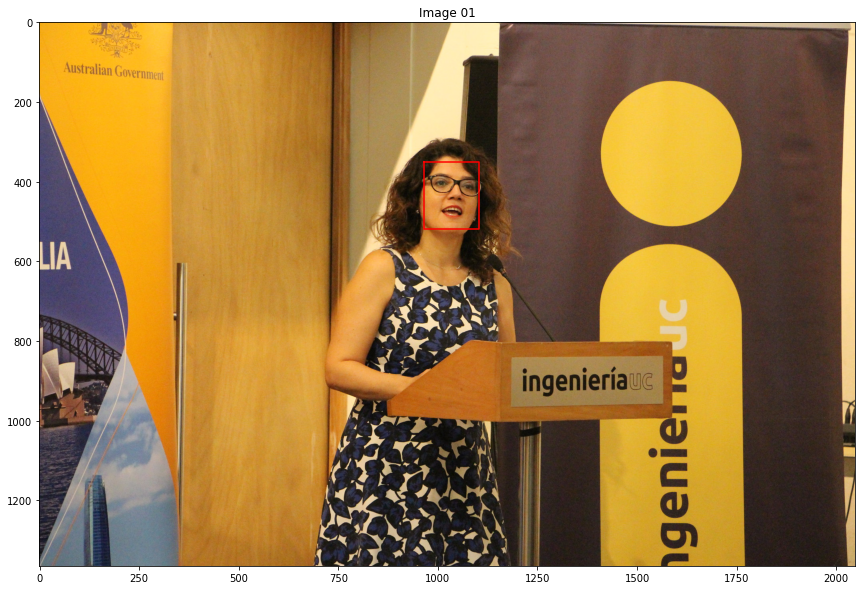

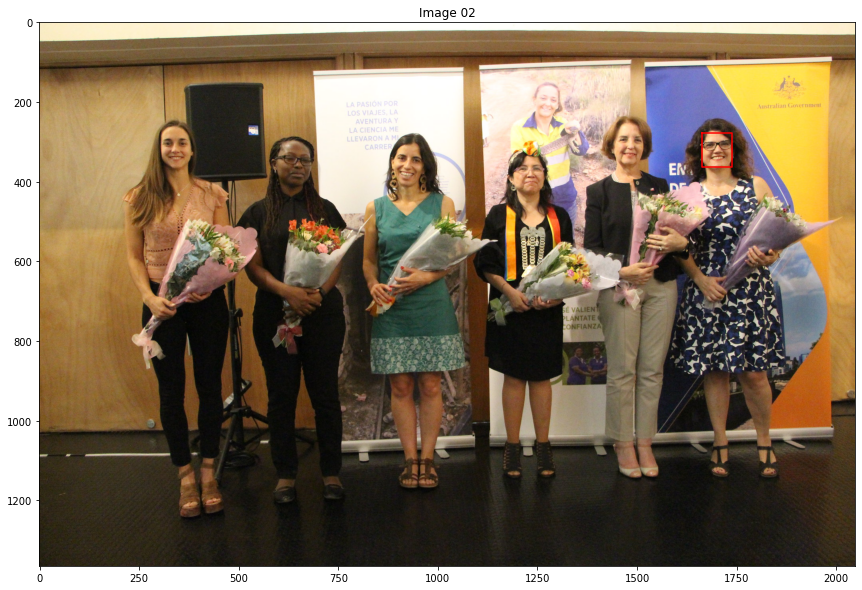

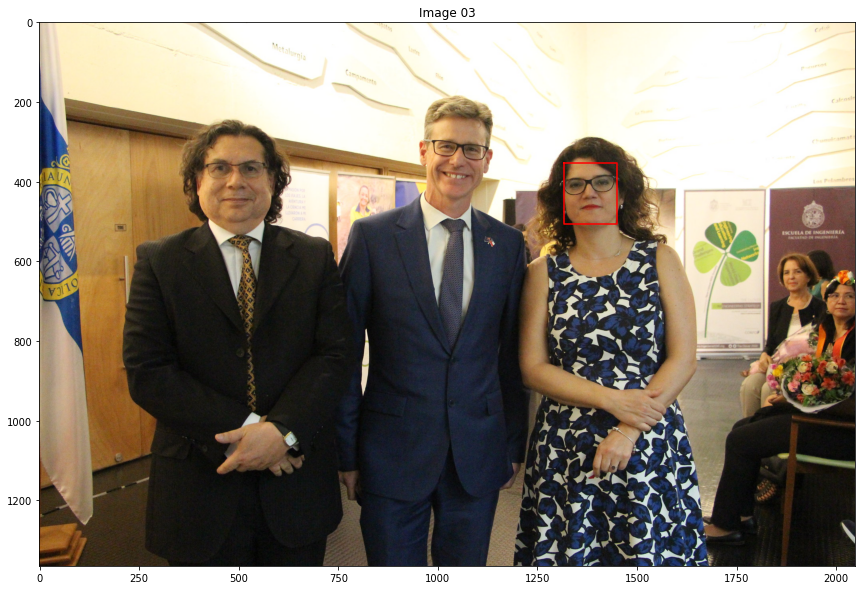

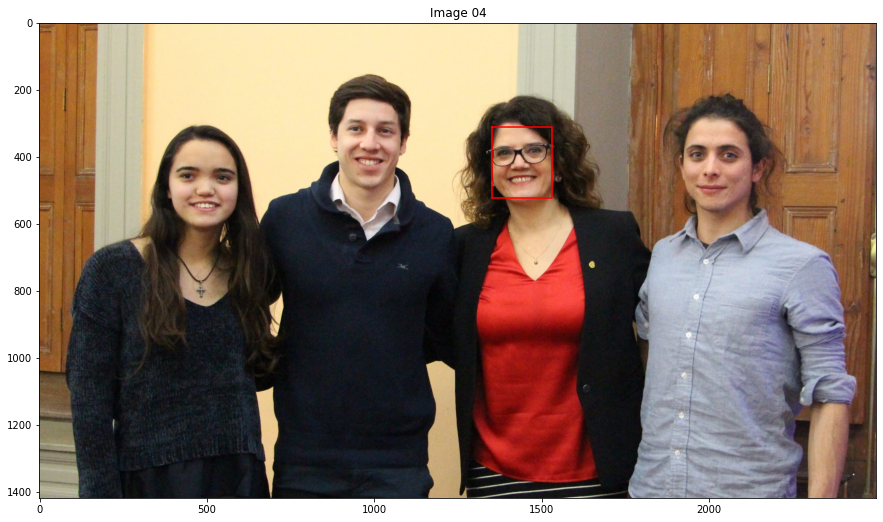

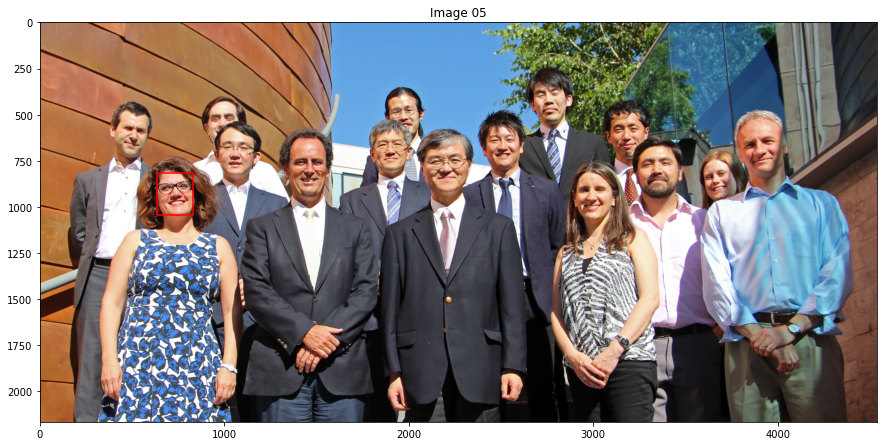

In [105]:
for j in indices:
  fig = plt.figure(figsize=(15, 10))

  k, x1, y1, x2, y2 = tuple(BB[j])
  x = [x1,x1,x2,x2,x1]
  y = [y1,y2,y2,y1,y1]

  im = cv2.imread('/content/fotos/ing0'+str(k)+'.jpg')
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.title('Image 0'+str(k))
  
  plt.plot(x,y,c='red')
  plt.show()
    

# <font color='red'>SUBIR EJERCICIO DE FORMA *** INDIVIDUAL *** A CANVAS</font> 

